<a href="https://colab.research.google.com/github/adityab24840/Learning-LLM/blob/main/Getting_started_with_SLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# pip install transformers

In [39]:
# pip install sentence-transformers

In [40]:
from sentence_transformers import SentenceTransformer

In [41]:
# Load the model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)

In [42]:
import numpy as np
def generate_embedding(text, normalize=False, batch=False):
    # Generate the embedding
    embedding = model.encode(text)
    return embedding


In [43]:
text = "This"
embedding = generate_embedding(text)
print(embedding)


[-6.77422881e-02  4.62602079e-02 -4.40196991e-02 -1.77944209e-02
  7.40244985e-03 -3.85435075e-02  8.51258263e-02  2.75502615e-02
  1.17351599e-02  3.07532754e-02 -7.64141977e-03  8.19422211e-03
 -8.65644123e-03  5.55650592e-02 -3.92512940e-02  2.80214101e-02
 -4.08548489e-02  8.24944228e-02 -8.35365802e-02 -4.54011634e-02
  5.42403152e-03  7.77565641e-03 -1.13182347e-02  3.40523645e-02
 -4.23011370e-02  4.17779572e-02 -1.25682983e-03  3.71140912e-02
  1.36337746e-02 -9.20760557e-02 -5.76593392e-02  4.50376868e-02
  4.40912694e-02  7.35326577e-03 -3.36629264e-02 -2.51802504e-02
 -7.62355998e-02  3.99236344e-02 -2.29819864e-02  8.34374782e-03
  2.97792628e-02 -6.05573691e-02 -3.04280650e-02  1.28755085e-02
  7.25993067e-02 -2.55393684e-02 -6.80690119e-03 -2.93173231e-02
  5.56586571e-02 -2.14933811e-04  3.03228735e-03 -8.32649507e-03
 -3.20251659e-02 -8.37644488e-02 -1.12328520e-02 -1.24163525e-02
 -5.40610477e-02 -7.91733433e-03  5.35053723e-02 -3.69021147e-02
  1.11856423e-02  8.46640

In [44]:
### Text Similarity Search

# Generate embeddings for a set of sentences or documents.
# Use cosine similarity to measure the similarity between embeddings.
# Find the closest match or rank all sentences/documents by similarity

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [46]:
def find_most_similar(sentences, query):
    # Generate embeddings for the sentences and the query
    sentence_embeddings = generate_embedding(sentences)
    query_embedding = generate_embedding([query])

    # Calculate cosine similarities
    similarities = cosine_similarity(query_embedding, sentence_embeddings)
    most_similar_index = np.argmax(similarities)

    return sentences[most_similar_index], similarities[0][most_similar_index]

In [47]:
sentences = ["I love machine learning.", "AI is the future.", "Data science is interesting."]
query = "I enjoy working with AI."

In [48]:
most_similar_sentence, similarity_score = find_most_similar(sentences, query)

In [49]:
print(f"Most similar sentence: {most_similar_sentence} (Score: {similarity_score})")

Most similar sentence: AI is the future. (Score: 0.6252813339233398)


In [50]:
# Clustering Text Data

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [51]:
def cluster_texts(sentences, num_clusters=3):
    # Generate embeddings
    embeddings = generate_embedding(sentences)

    # Cluster the embeddings
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(embeddings)
    labels = kmeans.labels_

    # Visualize the clusters
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
    plt.show()

    return labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


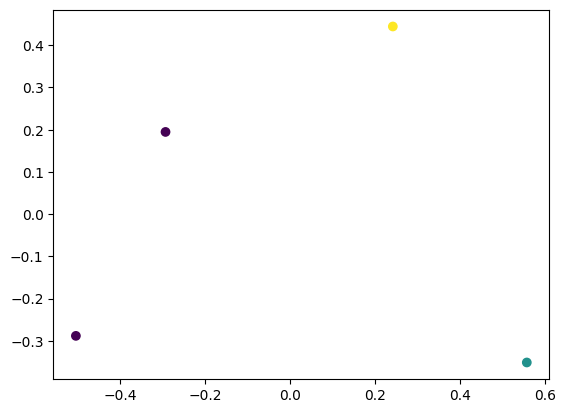

Cluster labels: [2 0 1 0]


In [52]:
sentences = ["I love machine learning.", "AI is the future.", "Data science is interesting.", "I enjoy working with AI."]
labels = cluster_texts(sentences)
print(f"Cluster labels: {labels}")

In [53]:
# Text Classification

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
def classify_texts(sentences, labels):
    # Generate embeddings
    embeddings = model.encode(sentences)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

    # Train a classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)

    # Evaluate the model
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [60]:
sentences = ["I love machine learning.", "AI is the future.", "Data science is interesting.", "I enjoy working with AI."]
labels = [1, 1, 0, 1]  # 1 for AI-related, 0 for non-AI-related


In [57]:
accuracy = classify_texts(sentences, labels)


In [58]:
print(f"Classification accuracy: {accuracy}")

Classification accuracy: 1.0
